# Heart Disease Classifier
- Heart disease is the leading cause of death in the United States, causing about 1 in 4 deaths.
- The following models predict whether a patient may have heart disease.
- Uses processed data from: https://www.kaggle.com/cherngs/heart-disease-cleveland-uci

In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## Upload data
Uploads the data using Panda read_csv() and visualises what it looks like!

In [2]:
heart_data = pd.read_csv("heart_cleveland_upload.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


## Understanding the Data
Checking the data looking for unique values in each column (except continuous columns like age, chol, thalach, etc.) & also ensuring there are no missing values in the dataset.

In [3]:
# checks for unique values in columns
labels = ['sex', 'cp', 'fbs','restecg', 'exang', 'slope', 'ca', 'thal', 'condition']
for label in labels:
    print(label + ":", heart_data[label].unique())

sex: [1 0]
cp: [0 1 2 3]
fbs: [1 0]
restecg: [2 0 1]
exang: [0 1]
slope: [1 0 2]
ca: [1 2 0 3]
thal: [0 2 1]
condition: [0 1]


In [4]:
# ensures there are no missing values
heart_data.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

## Data Visualisation
Understanding the dataset better by visualising it through Matplotlib and Seaborn (Python libraries).

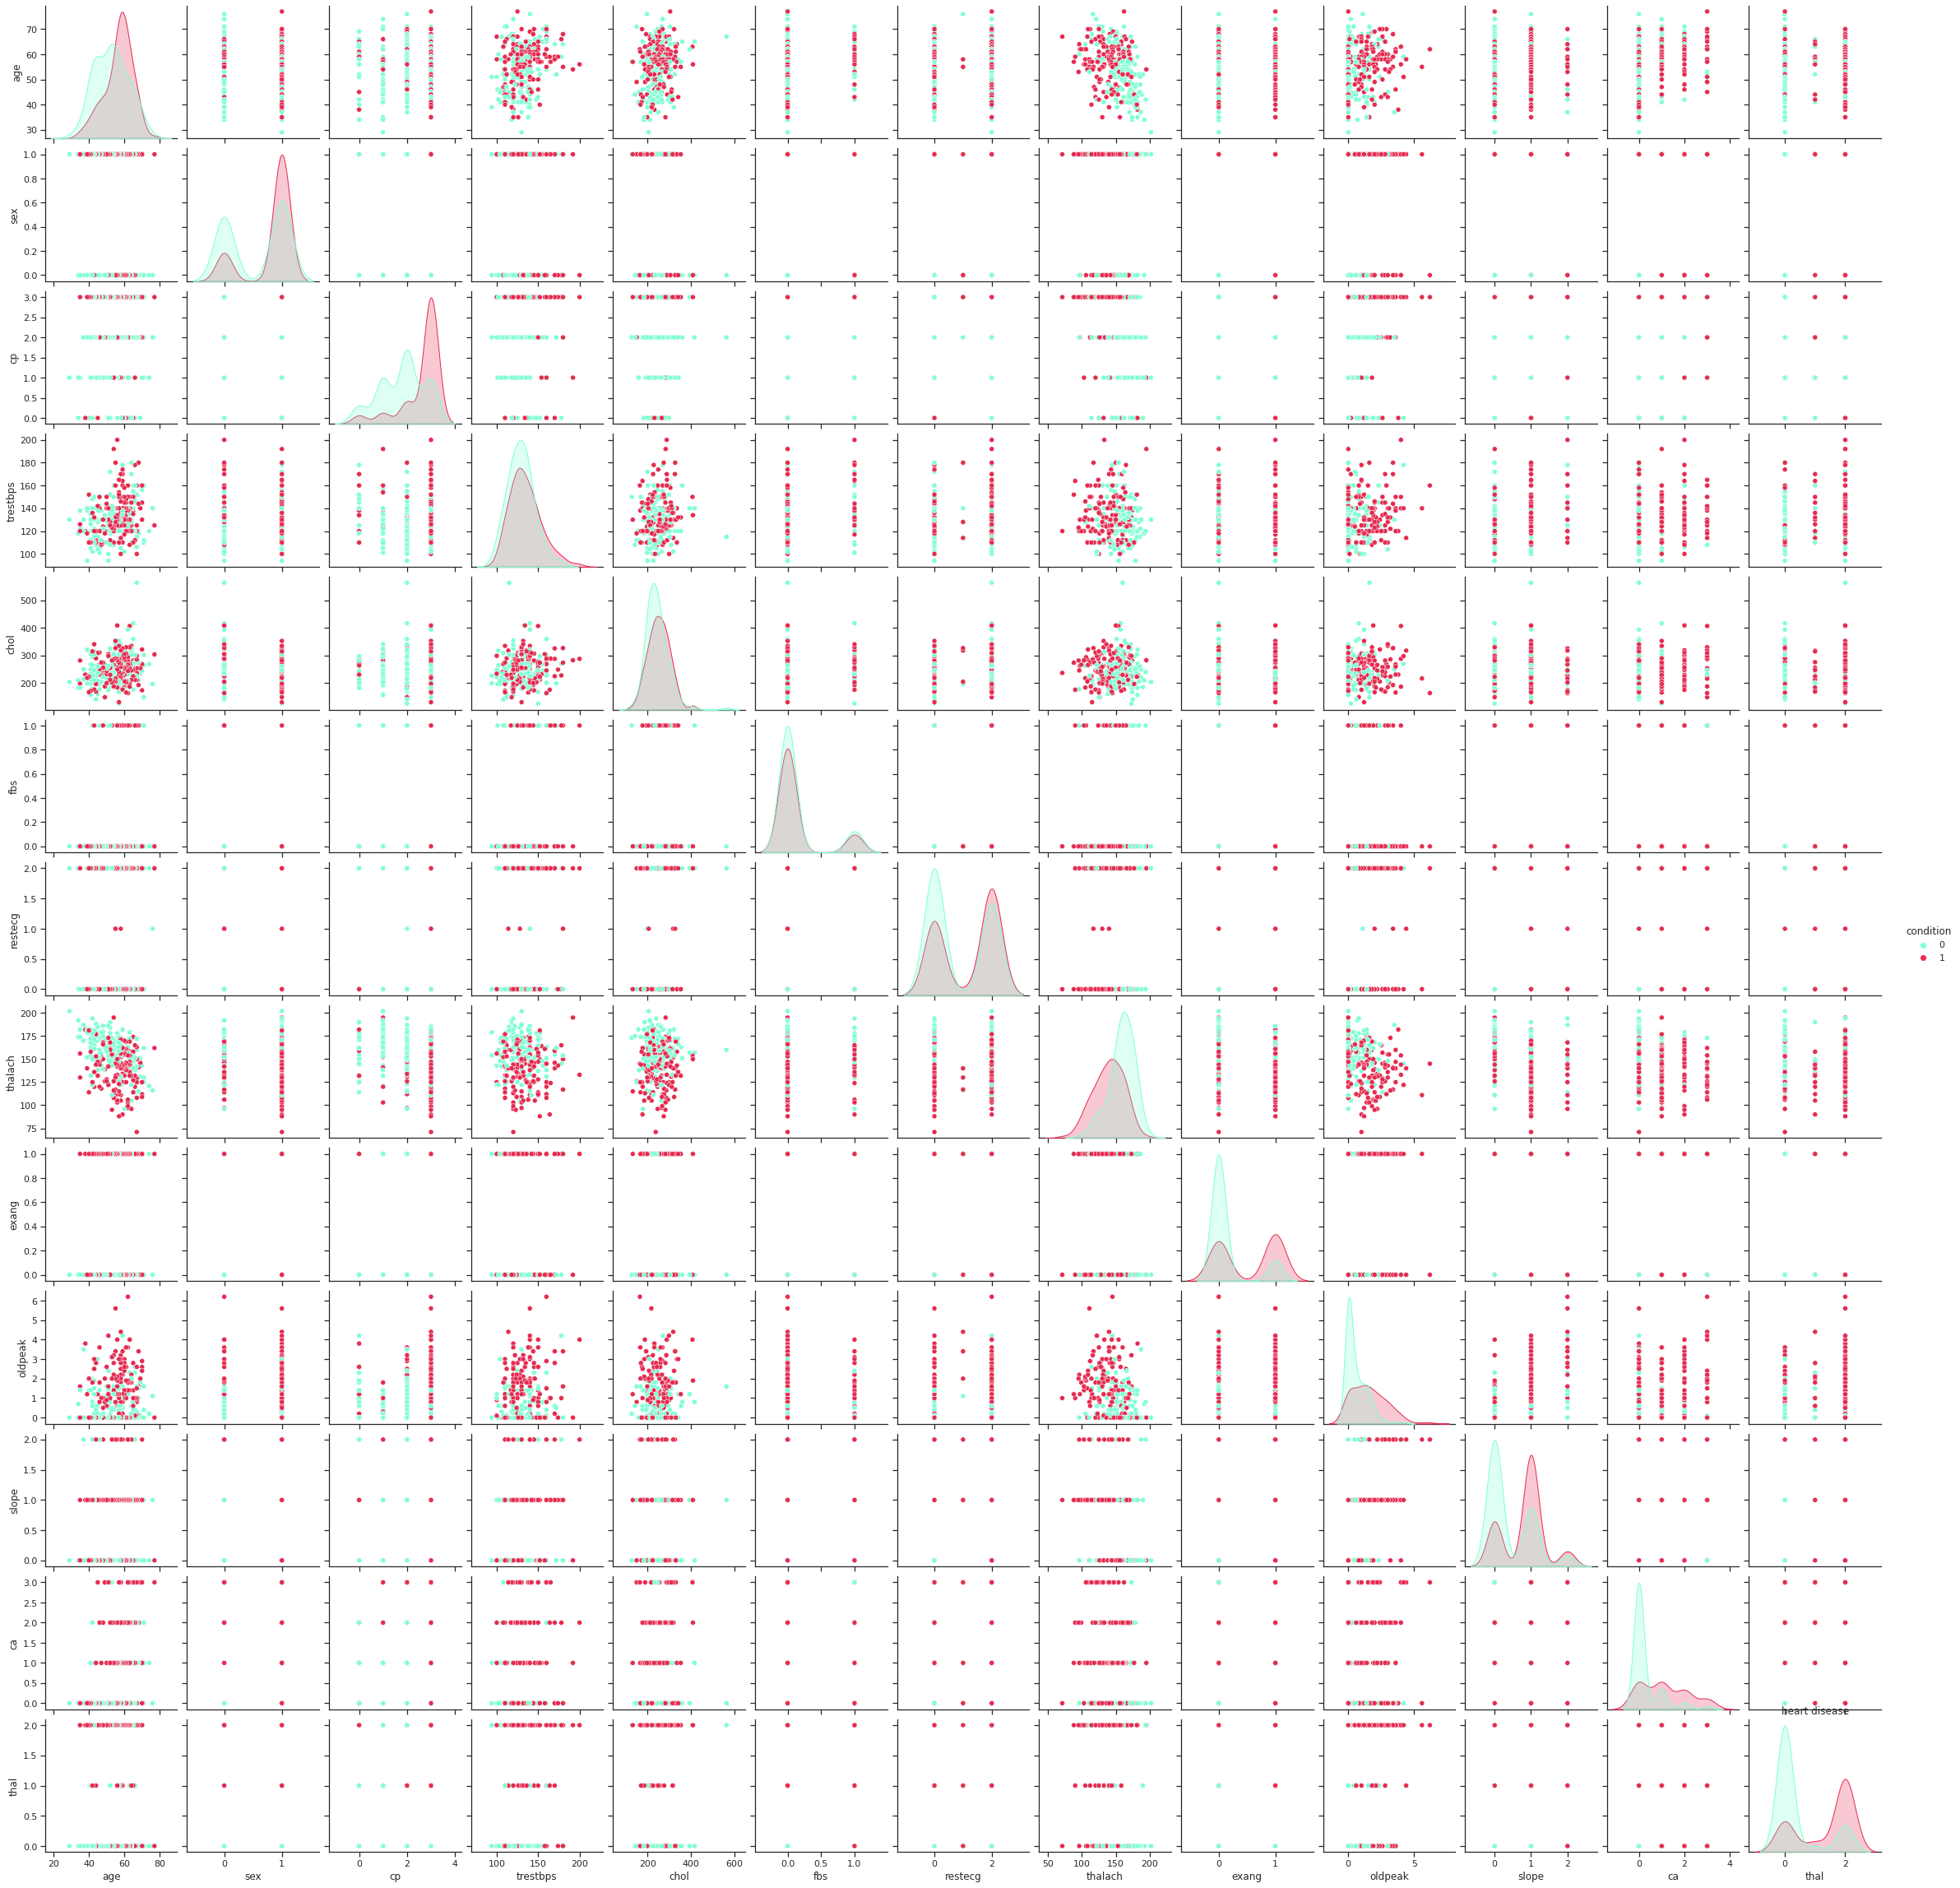

In [5]:
# a pairplot!
sns.set(style="ticks");
pal = ["#7FFFD4", "#E52B50"]

sns.pairplot(heart_data, hue="condition", palette=pal);
plt.title("heart disease");

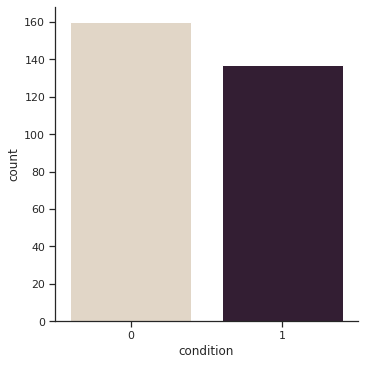

In [6]:
# checks how many patients in dataset have heart disease
sns.catplot(x="condition", kind="count", palette="ch:.25", data=heart_data)

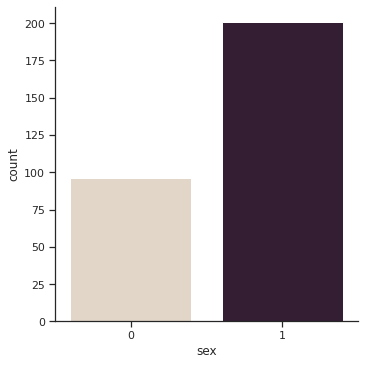

In [7]:
# check there is a good gender balance
sns.catplot(x="sex", kind="count", palette="ch:.25", data=heart_data)

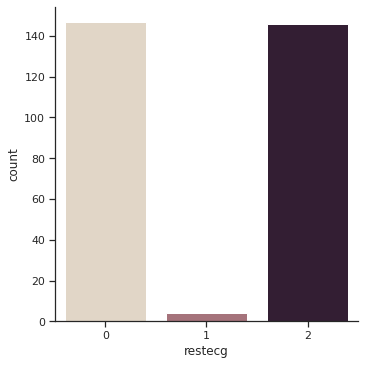

In [8]:
# distribution of electrocardiographic results
sns.catplot(x="restecg", kind="count", palette="ch:.25", data=heart_data)

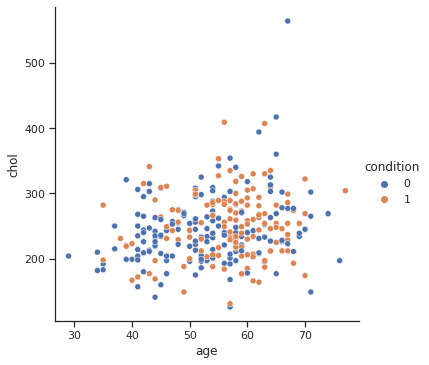

In [9]:
# correlation between 'age' and 'cholesterol'?
sns.relplot(x="age", y="chol", hue="condition", data=heart_data);

## Processing Data for Model Training
Splitting data into X (features) and y (the label) and training & testing data.

In [10]:
# split into features & label
X = heart_data.drop("condition", axis = 1)
y = heart_data.iloc[:, 13]

# split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Scikit-Learn to train Machine Learning Algorithms
Use the scikit-learn Python library to train:
- Gaussian Naive Bayes
- Random Forest Classifier
- Extra Trees Classifier

In [11]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)

In [12]:
y_pred_gnb = gnb.predict(X_test)

print("Accuracy Score: {:.3f}%".format(accuracy_score(y_test, y_pred_gnb)*100))

Accuracy Score: 83.333%


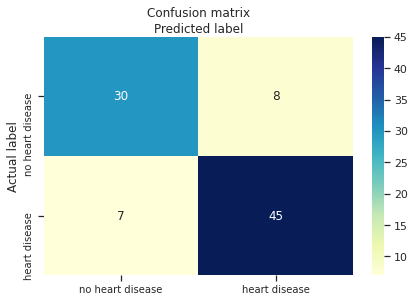

In [13]:
# create a confusion matrix to visualise accuracy
matrix = confusion_matrix(y_test, y_pred_gnb)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticklabels(['no heart disease','heart disease'], fontsize = 10)
ax.yaxis.set_ticklabels(['no heart disease', 'heart disease'], fontsize = 10)
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion='entropy').fit(X_train, y_train)


In [15]:
y_pred_rfc = rfc.predict(X_test)

print("Accuracy Score: {:.3f}%".format(accuracy_score(y_test, y_pred_rfc)*100))

Accuracy Score: 80.000%


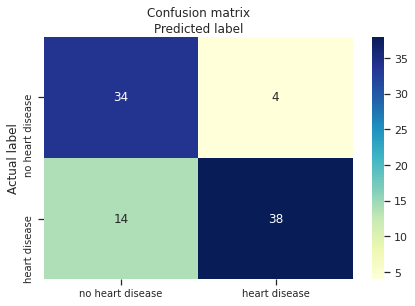

In [16]:
# create a confusion matrix to visualise accuracy
matrix = confusion_matrix(y_test, y_pred_rfc)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticklabels(['no heart disease','heart disease'], fontsize = 10)
ax.yaxis.set_ticklabels(['no heart disease', 'heart disease'], fontsize = 10)
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [17]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(criterion='entropy').fit(X_train, y_train)

In [18]:
y_pred_etc = etc.predict(X_test)

print("Accuracy Score: {:.3f}%".format(accuracy_score(y_test, y_pred_etc)*100))

Accuracy Score: 85.556%


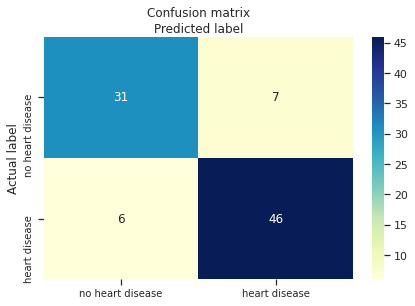

In [19]:
# create a confusion matrix to visualise accuracy
matrix = confusion_matrix(y_test, y_pred_etc)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticklabels(['no heart disease','heart disease'], fontsize = 10)
ax.yaxis.set_ticklabels(['no heart disease', 'heart disease'], fontsize = 10)
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Results
Extra Trees Classifier seems to be best at predicting more 'heart disease' patients correctly!

## Use Tensorflow to Train a Neural Network Model
Use the Tensorflow & Keras library to create a Neural Network

In [20]:
# import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation, BatchNormalization

In [21]:
# train a sequential model
model = Sequential()

model.add(Dense(12, input_shape=(13,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # sigmoid gives a percentage, better for models like this!

In [22]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
# train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
21/21 [==============================] - 0s 2ms/step - loss: 0.3616 - accuracy: 0.8647
Epoch 2/150
21/21 [==============================] - 0s 2ms/step - loss: 0.3448 - accuracy: 0.8502
Epoch 3/150
21/21 [==============================] - 0s 2ms/step - loss: 0.3440 - accuracy: 0.8551
Epoch 4/150
21/21 [==============================] - 0s 2ms/step - loss: 0.3457 - accuracy: 0.8599
Epoch 5/150
21/21 [==============================] - 0s 2ms/step - loss: 0.3430 - accuracy: 0.8696
Epoch 6/150
21/21 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.8599
Epoch 7/150
21/21 [==============================] - 0s 2ms/step - loss: 0.3446 - accuracy: 0.8502
Epoch 8/150
21/21 [==============================] - 0s 2ms/step - loss: 0.3387 - accuracy: 0.8599
Epoch 9/150
21/21 [==============================] - 0s 2ms/step - loss: 0.3433 - accuracy: 0.8551
Epoch 10/150
21/21 [==============================] - 0s 2ms/step - loss: 0.3392 - accuracy: 0.8599
Epoch 11/

In [32]:
# get the accuracy
m_eval = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
print('Accuracy: %.2f loss: %.2f' % (m_eval[1]*100, m_eval[0]))

1/1 [==============================] - 0s 15ms/step - loss: 0.3725 - accuracy: 0.8556
Accuracy: 85.56 loss: 0.37


In [33]:
# use the model on the testing data
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")

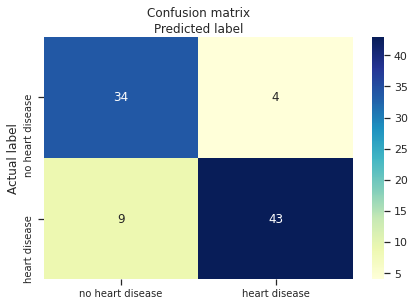

In [34]:
# create a confusion matrix to visualise accuracy
matrix = confusion_matrix(y_test, y_pred_nn)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticklabels(['no heart disease','heart disease'], fontsize = 10)
ax.yaxis.set_ticklabels(['no heart disease', 'heart disease'], fontsize = 10)
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Results
This Neural Network seems to accurately predict many 'heart disease' patients correctly!